# Chapter 1
Notebook by Jim Arnold

## Introduction
Following examples from https://www.nltk.org/book/ch01.html

## Getting Started with NLTK

In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# optional - run if first time
# nltk.download()

Download "all" ... 

Load book data:

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
text1

<Text: Moby Dick by Herman Melville 1851>

### Searching Text
There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. Here we look up the word monstrous in Moby Dick by entering text1 followed by a period, then the term concordance, and then placing  "monstrous" in parentheses:

In [4]:
text1.concordance('monstrous')

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [5]:
text2.concordance('affection')

Displaying 25 of 79 matches:
, however , and , as a mark of his affection for the three girls , he left them
t . It was very well known that no affection was ever supposed to exist between
deration of politeness or maternal affection on the side of the former , the tw
d the suspicion -- the hope of his affection for me may warrant , without impru
hich forbade the indulgence of his affection . She knew that his mother neither
rd she gave one with still greater affection . Though her late conversation wit
 can never hope to feel or inspire affection again , and if her home be uncomfo
m of the sense , elegance , mutual affection , and domestic comfort of the fami
, and which recommended him to her affection beyond every thing else . His soci
ween the parties might forward the affection of Mr . Willoughby , an equally st
 the most pointed assurance of her affection . Elinor could not be surprised at
he natural consequence of a strong affection in a young and ardent mind . This 
 opinion . 

A concordance permits us to see words in context. For example, we saw that monstrous occurred in contexts such as the *___ pictures* and *a ___ size*. 

What other words appear in a similar range of contexts? We can find out by appending the term similar to the name of the text in question, then inserting the relevant word in parentheses:

In [6]:
# in Moby Dick
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [7]:
# in Sense and Sensibility
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


Observe that we get different results for different texts. Austen uses this word quite differently from Melville; for her, monstrous has positive connotations, and sometimes functions as an intensifier like the word very.

The term common_contexts allows us to examine just the contexts that are shared by two or more words, such as monstrous and very. We have to enclose these words by square brackets as well as parentheses, and separate them with a comma:

In [8]:
text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


In [9]:
# let's compare usage of God in the book of genesis text3 and monty python text6...
print('Genesis...')
print(text3.similar('God'))
print("")
print('Monty Python...')
print(text6.similar('God'))
print("")

Genesis...
he joseph pharaoh jacob they abraham she isaac sarah them him it i me
abram laban thee cain esau judah
None

Monty Python...
the coconut bristol
None



In [10]:
# let's see what God and coconut hvae in common
text6.common_contexts(["God", "coconut"])

of_and


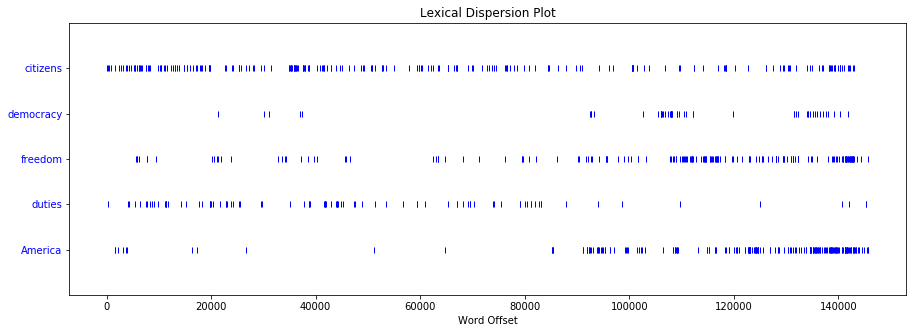

In [11]:
# plot relative location of a word in a text
plt.figure(figsize=(15,5))
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

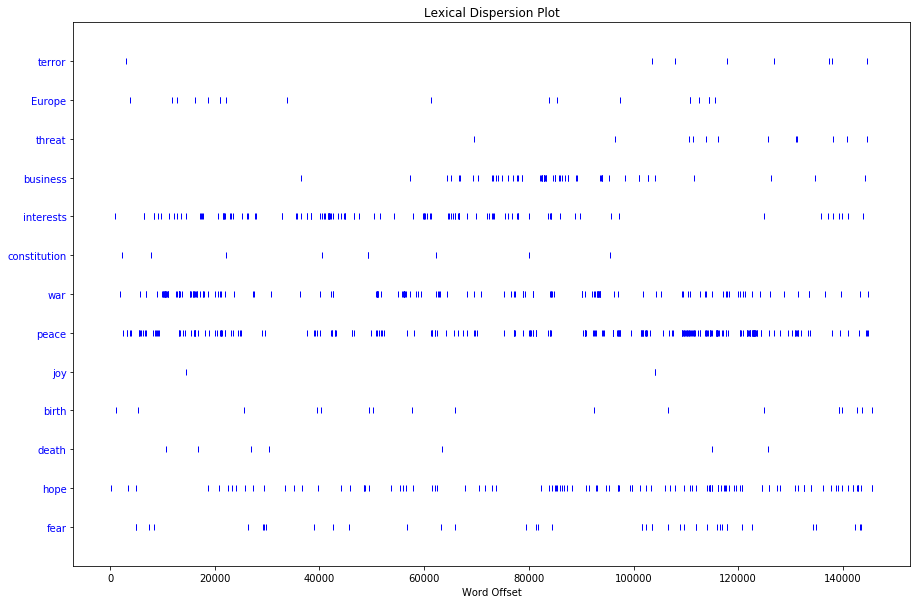

In [12]:
# plot relative location of a word in a text
plt.figure(figsize=(15,10))
text4.dispersion_plot(["terror", "Europe", "threat",
                       "business", "interests", "constitution", 
                       "war", "peace",
                       "joy", "birth", "death", 
                       "hope", "fear"])

### Counting Vocabulary

The most obvious fact about texts that emerges from the preceding examples is that they differ in the vocabulary they use. In this section we will see how to use the computer to count the words in a text in a variety of useful ways. As before, you will jump right in and experiment with the Python interpreter, even though you may not have studied Python systematically yet. Test your understanding by modifying the examples, and trying the exercises at the end of the chapter.

Let's begin by finding out the length of a text from start to finish, in terms of the words and punctuation symbols that appear. We use the term len to get the length of something, which we'll apply here to the book of Genesis:

In [13]:
len(text3)

44764

So Genesis has 44,764 words and punctuation symbols, or "tokens." A token is the technical name for a sequence of characters — such as hairy, his, or :) — that we want to treat as a group. When we count the number of tokens in a text, say, the phrase to be or not to be, we are counting occurrences of these sequences. Thus, in our example phrase there are two occurrences of to, two of be, and one each of or and not. But there are only four distinct vocabulary items in this phrase. How many distinct words does the book of Genesis contain? 

To work this out in Python, we have to pose the question slightly differently. The vocabulary of a text is just the set of tokens that it uses, since in a set, all duplicates are collapsed together. 

In Python we can obtain the vocabulary items of text3 with the command: set(text3). When you do this, many screens of words will fly past. Now try the following:

In [14]:
st3 = sorted(set(text3))
len(st3)

2789

By wrapping sorted() around the Python expression set(text3) [1], we obtain a sorted list of vocabulary items, beginning with various punctuation symbols and continuing with words starting with A. All capitalized words precede lowercase words. We discover the size of the vocabulary indirectly, by asking for the number of items in the set, and again we can use len to obtain this number [2]. Although it has 44,764 tokens, this book has only 2,789 distinct words, or "word types." A word type is the form or spelling of the word independently of its specific occurrences in a text — that is, the word considered as a unique item of vocabulary. Our count of 2,789 items will include punctuation symbols, so we will generally call these unique items types instead of word types.

Now, let's calculate a measure of the lexical richness of the text. The next example shows us that the number of distinct words is just 6% of the total number of words, or equivalently that each word is used 16 times on average (remember if you're using Python 2, to start with from __future__ import division).

In [15]:
# lexical richness
len(st3) / len(text3)

0.06230453042623537

In [16]:
# average token frequency
len(text3) / len(st3) 

16.050197203298673

Next, let's focus on particular words. We can count how often a word occurs in a text, and compute what percentage of the text is taken up by a specific word:

In [17]:
wordList = ['smote', 'Lord', 'God', 'a']
print("Word count in Book of Genesis:")
for word in wordList:
    print("%s: %d" % (word, text3.count(word))) 

Word count in Book of Genesis:
smote: 5
Lord: 0
God: 231
a: 342


In [18]:
# define functions for lexical diversity
def lexical_diversity(text):
    return len(set(text)) / len(text)

def percentage(word, text):
    return 100 * text.count(word) / len(text)

In [19]:
print("Percentage of word count in Book of Genesis:")
for word in wordList:
    print("%s: %f" % (word, percentage(word,text3)))

Percentage of word count in Book of Genesis:
smote: 0.011170
Lord: 0.000000
God: 0.516040
a: 0.764007


In [20]:
# generate dict of word counts for each word in text
wordCount = {word:text3.count(word) for word in sorted(set(text3))}

In [21]:
len(wordCount)

2789

In [22]:
# get top 10 most common tokens in the book of genesis
wordCount = pd.Series(wordCount)
wordCount.sort_values(ascending=False).head(10)

,      3681
and    2428
the    2411
of     1358
.      1315
And    1250
his     651
he      648
to      611
;       605
dtype: int64

### Variables

In [23]:
len(text1)

260819

In [24]:
text1[0:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [25]:
vocab = set(text1)
vocab_size = len(vocab)
print(vocab_size)

19317


### Strings

In [26]:
# example
name = 'Monty'
print("Given: ")
print("name = 'Monty'")
print("name[0] = %s" % name[0])
print("name[:4] = %s" % name[:4])

Given: 
name = 'Monty'
name[0] = M
name[:4] = Mont


In [27]:
# join strings from list
' '.join(['Monty', 'Python'])

'Monty Python'

In [28]:
# split string into list
'Monty Python'.split()

['Monty', 'Python']

## Computing with Language: Simple Statistics

In this section we pick up the question of what makes a text distinct, and use automatic methods to find characteristic words and expressions of a text. 

In [29]:
saying = ['After', 'all', 'is', 'said', 'and',
          'done', 'more', 'is', 'said', 'than', 'done']
# whole thing
print(sorted(set(saying)))
# last 2
print(sorted(set(saying))[-2:])

['After', 'all', 'and', 'done', 'is', 'more', 'said', 'than']
['said', 'than']


### Frequency Distributions

How can we automatically identify the words of a text that are most informative about the topic and genre of the text? Imagine how you might go about finding the 50 most frequent words of a book. One method would be to keep a tally for each vocabulary item, like that shown in 3.1. The tally would need thousands of rows, and it would be an exceedingly laborious process — so laborious that we would rather assign the task to a machine.

A **frequency distribution** tells us the frequency of each vocabulary item in the text. (In general, it could count any kind of observable event.) It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. Since we often need frequency distributions in language processing, NLTK provides built-in support for them. Let's use a  FreqDist to find the 50 most frequent words of Moby Dick:

In [30]:
fdist1 = FreqDist(text1)
fdist1.most_common(10)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

Note: I did this similar thing using a dict comprehension above. Good to know that it's built-in with nltk.

In [31]:
fdist1['whale']

906

When we first invoke FreqDist, we pass the name of the text as an argument [1]. We can inspect the total number of words ("outcomes") that have been counted up [2] — 260,819 in the case of Moby Dick. The expression most_common(50) gives us a list of the 50 most frequently occurring types in the text [3].

Do any words produced in the last example help us grasp the topic or genre of this text? Only one word, whale, is slightly informative! It occurs over 900 times. The rest of the words tell us nothing about the text; they're just English "plumbing." What proportion of the text is taken up with such words? We can generate a cumulative frequency plot for these words, using fdist1.plot(50, cumulative=True), to produce the graph in 3.2. These 50 words account for nearly half the book!

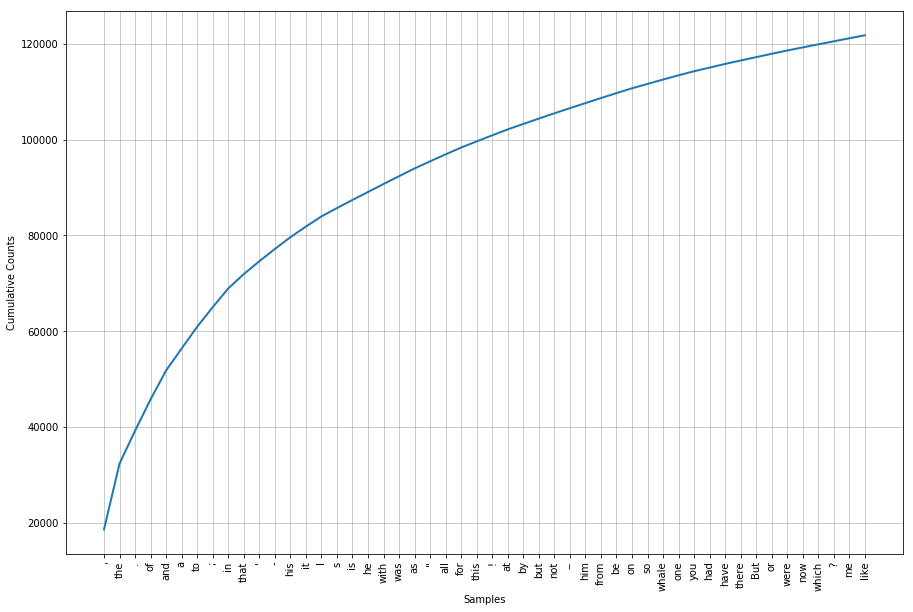

In [32]:
plt.figure(figsize=(15,10))
fdist1.plot(50, cumulative=True)

If the frequent words don't help us, how about the words that occur once only, the so-called hapaxes? View them by typing fdist1.hapaxes(). This list contains lexicographer, cetological, contraband, expostulations, and about 9,000 others. It seems that there are too many rare words, and without seeing the context we probably can't guess what half of the hapaxes mean in any case! Since neither frequent nor infrequent words help, we need to try something else.

In [33]:
# get first 10 hapaxes
fdist1.hapaxes()[:10]

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly']

### Fine-grained Selection of Words

Next, let's look at the long words of a text; perhaps these will be more characteristic and informative. For this we adapt some notation from set theory. We would like to find the words from the vocabulary of the text that are more than 15 characters long. Let's call this property P, so that P(w) is true if and only if w is more than 15 characters long. Now we can express the words of interest using mathematical set notation as shown in (1a). This means "the set of all w such that w is an element of V (the vocabulary) and w has property P".

In [34]:
long_words = [w for w in set(text1) if w.startswith('a')]
sorted(long_words)

['a',
 'aback',
 'abaft',
 'abandon',
 'abandoned',
 'abandonedly',
 'abandonment',
 'abased',
 'abasement',
 'abashed',
 'abate',
 'abated',
 'abatement',
 'abating',
 'abbreviate',
 'abbreviation',
 'abeam',
 'abed',
 'abhorred',
 'abhorrence',
 'abhorrent',
 'abhorring',
 'abide',
 'abided',
 'abiding',
 'ability',
 'abjectly',
 'able',
 'ablutions',
 'aboard',
 'abode',
 'abominable',
 'abominate',
 'abominated',
 'abomination',
 'aboriginal',
 'aboriginally',
 'aboriginalness',
 'abortion',
 'abortions',
 'abound',
 'abounded',
 'abounding',
 'aboundingly',
 'about',
 'above',
 'abreast',
 'abridged',
 'abroad',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorbed',
 'absorbing',
 'absorbingly',
 'abstained',
 'abstemious',
 'abstinence',
 'abstract',
 'abstracted',
 'abstraction',
 'absurd',
 'absurdly',
 'abundance',
 'abundant',
 'abundantly',
 'accelerate',
 'accelerated',
 'accelerating',
 'accept',
 'accessible',
 'accessory',
 'accident',
 'accidental'

For each word w in the vocabulary V, we check whether len(w) is greater than 15; all other words will be ignored. We will discuss this syntax more carefully later.

In [35]:
alphabet = list('abcdefghijklmnopqrstuzwxyz')

In [36]:
# generate dict of alphabet and # of words in the text beginning with each letter 
wordCount = {letter:len([w for w in set(text1) if w.startswith(letter)]) for letter in alphabet}

In [37]:
# number of words in Moby Dick starting with each letter of the alphabet: 

Let's return to our task of finding words that characterize a text. Notice that the long words in text4 reflect its national focus — constitutionally, transcontinental — whereas those in text5 reflect its informal content: boooooooooooglyyyyyy and yuuuuuuuuuuuummmmmmmmmmmm. 

Have we succeeded in automatically extracting words that typify a text? Well, these very long words are often hapaxes (i.e., unique) and perhaps it would be better to find frequently occurring long words. 

This seems promising since it eliminates frequent short words (e.g., the) and infrequent long words (e.g. antiphilosophists). 

Here are all words from the chat corpus that are longer than seven characters, that occur more than seven times:

In [38]:
# get long words (>7) which are used more than 7 times 
fdist5 = FreqDist(text5)
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

Notice how we have used two conditions: len(w) > 7 ensures that the words are longer than seven letters, and fdist5[w] > 7 ensures that these words occur more than seven times. At last we have managed to automatically identify the frequently-occurring content-bearing words of the text. It is a modest but important milestone: a tiny piece of code, processing tens of thousands of words, produces some informative output.

### Collocations and Bigrams

A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.

To get a handle on collocations, we start off by extracting from a text a list of word pairs, also known as bigrams. This is easily accomplished with the function bigrams():

In [43]:
# bigrams on a list is makes local combinations
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

Now, collocations are essentially just frequent bigrams, except that we want to pay more attention to the cases that involve rare words. In particular, we want to find bigrams that occur more often than we would expect based on the frequency of the individual words. The collocations() function does this for us. We will see how it works later.

In [50]:
# text4.collocations()
# seems broken... need to investigate
# get error: 
# ValueError: too many values to unpack (expected 2)

### Counting Other Things

Counting words is useful, but we can count other things too. For example, we can look at the distribution of word lengths in a text, by creating a FreqDist out of a long list of numbers, where each number is the length of the corresponding word in the text:



In [84]:
# get dist of word length in text1
fdist = FreqDist(len(w) for w in text1)

#### plotting word length dists

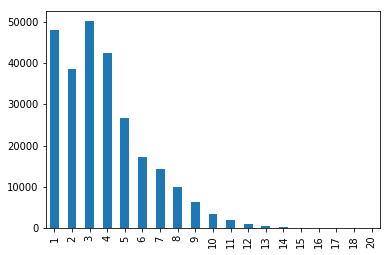

In [77]:
# try making histogram
# ended up making bar plot, which serves same purpose
# sort_index makes it ordered
lenFreq = pd.Series(FreqDist(len(w) for w in text1), name="length").sort_index()
lenFreq.plot(kind='bar', y='length')

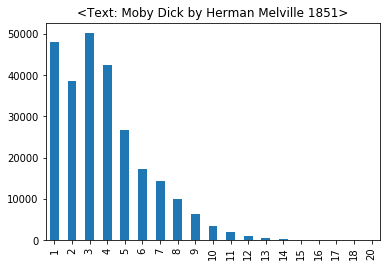

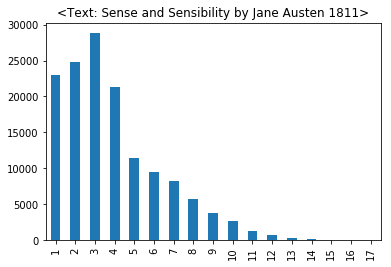

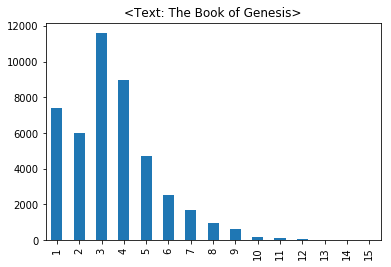

In [82]:
# compare word length across 3 different texts
textList = [text1,text2,text3]
for text in textList:
    lenFreq = pd.Series(FreqDist(len(w) for w in text), name="length").sort_index()
    lenFreq.plot(kind='bar', y='length')
    plt.title(str(text))
    plt.show()
    
# hw: modify to produce overlapping dists. 
# consider pd.concat, color by title.

We start by deriving a list of the lengths of words in text1 [1], and the FreqDist then counts the number of times each of these occurs [2]. The result [3] is a distribution containing a quarter of a million items, each of which is a number corresponding to a word token in the text. But there are at most only 20 distinct items being counted, the numbers 1 through 20, because there are only 20 different word lengths. I.e., there are words consisting of just one character, two characters, ..., twenty characters, but none with twenty one or more characters. One might wonder how frequent the different lengths of word are (e.g., how many words of length four appear in the text, are there more words of length five than length four, etc). We can do this as follows:

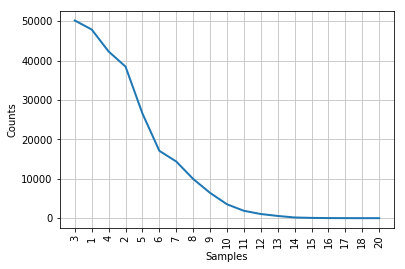

In [86]:
# builtin functions from NLTK
fdist.plot()

### Helpful FreqDist functions

In [91]:
# create a frequency distribution containing the given samples
fdist = FreqDist(text1)
#count of the number of times a given sample occurred
fdist['monstrous']

10

In [92]:
# frequency of a given sample
fdist.freq('monstrous')

3.834076505162584e-05

In [93]:
#total number of samples
fdist.N()

260819

In [94]:
# get n most common samples
fdist.most_common(5)

[(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024)]

In [95]:
# iterate over samples
# for sample in fdist:

# get max
fdist.max()

','

In [98]:
# tabulate the frequency distribution
#fdist.tabulate()

# not sure what this is used for...

                   ,                  the                    .                   of                  and                    a                   to                    ;                   in                 that                    '                    -                  his                   it                    I                    s                   is                   he                 with                  was                   as                    "                  all                  for                 this                    !                   at                   by                  but                  not                   --                  him                 from                   be                   on                   so                whale                  one                  you                  had                 have                there                  But                   or                 were                  now                which              

            congenial                 bend               policy             familiar             specimen             maternal           coronation                  dip            mysteries             schooner             wheeling              obliged             boarding              stately               sister               safely              snuffed                gaunt                   ah            splinters            revealing             glorious               mutual                 Rome                 navy             assaults               pirate               thirds             Emperors                 road                Hosea                  Try              gallows             recently                  Cod             prospect                rooms               smoked              herring           benevolent              decided              Cologne           pertaining           continuous               fasten             reverend                 tent             

               scowl                 wast                lingo              gettest            insulated              tellest                 bind                 Lost             devoured           parmacetty                 Mind               Answer        concentrating               owning                 sect          anomalously               dashes         Scandinavian             poetical            seclusion            greatness              veriest              trifles            strictest               unclad                 lack                 tuns        contemplative         reminiscence                 sage               Rising                 shad               header               goodly               income             arriving             hospital          utilitarian           economical              brimmed             buttoned               engage             princely              fortune           shouldered           sepulchral             treasure           abu

             princess               bamboo             platters              copying                ducks                Giver          consecrated         consecrating             beverage           circulates           precedence              luggage             Hoisting             Acushnet                 Huge               forges                 melt           betokening          endlessness      intolerableness              Gaining                waxed            snortings             turnpike          magnanimity              records               ducked               Sultan             ropeyarn             buckling              jeering             assembly        companionable            dignified          whitewashed              boobies             saplings            mimicking                Hallo             stalking                 bevy              roughly              ticking              whipped                lasso             Shooting                voted             

               joist                Apply           phrenology              fibrous         undecreasing            smallness          compensated          indomitable                   81             wavingly            borrowing           invertedly           contradict            Newcastle          indubitably                CLEAN            deserving                Aware              harness            unrolling        incrustations          overgrowing            afflicted             jaundice            infirmity         questionable             retarded               muzzle           commotions             upbubble            paregoric              Adverse             Indiaman            Hindostan               buries              wallows             cumbrous             deriding              gesture           ungracious                mocks                dares           greyhounds           villainous               Halloo              budding                 suds              

               18713                13721                 6862                 6536                 6024                 4569                 4542                 4072                 3916                 2982                 2684                 2552                 2459                 2209                 2124                 1739                 1695                 1661                 1659                 1632                 1620                 1478                 1462                 1414                 1280                 1269                 1231                 1137                 1113                 1103                 1070                 1058                 1052                 1030                 1005                  918                  906                  889                  841                  767                  760                  715                  705                  697                  680                  646                  640              

                   6                    6                    6                    6                    6                    6                    6                    6                    6                    6                    6                    6                    6                    6                    6                    6                    6                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5              

                   2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2              

                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1             

                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1             

                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1             

""


In [100]:
# graphical plot of the frequency distribution
fdist.plot()

KeyboardInterrupt: 

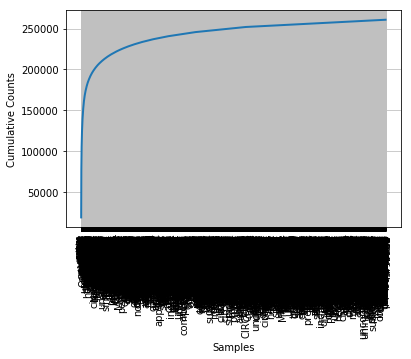

In [99]:
# cumulative plot of the frequency distribution

# be warned, this took a while to produce
#fdist.plot(cumulative=True)

In [ ]:
# update fdist1 with counts from fdist2
# fdist1 |= fdist2

# I bet this is great for comparative studies. 
# Maybe like building fdists of texts from different categories

In [ ]:
# test if samples in fdist1 occur less frequently than in fdist2
#fdist1 < fdist2

# again, great for comparisons

## Back to Python: Making Decisions and Taking Control

Using control and logical operators to automate processing.

We can use these to select different words from a sentence of news text. Here are some examples — only the operator is changed from one line to the next. They all use sent7, the first sentence from text7 (Wall Street Journal). As before, if you get an error saying that sent7 is undefined, you need to first type:  from nltk.book import *

In [101]:
sent7

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.']

In [102]:
[w for w in sent7 if len(w) < 4]

[',', '61', 'old', ',', 'the', 'as', 'a', '29', '.']

In [103]:
[w for w in sent7 if len(w) <= 4]

[',', '61', 'old', ',', 'will', 'join', 'the', 'as', 'a', 'Nov.', '29', '.']

In [104]:
[w for w in sent7 if len(w) != 4]

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 '29',
 '.']

### Useful string functions

There is a common pattern to all of these examples: [w for w in text if condition ], where condition is a Python "test" that yields either true or false. In the cases shown in the previous code example, the condition is always a numerical comparison. However, we can also test various properties of words, using the functions listed in 4.2.


    Function	        Meaning
    s.startswith(t) --  test if s starts with t
    
    s.endswith(t)   -- test if s ends with t
    
    t in s       -- test if t is a substring of s
    
    s.islower()	     -- test if s contains cased characters and all are lowercase
    
    s.isupper()	     -- test if s contains cased characters and all are uppercase
    
    s.isalpha()	     -- test if s is non-empty and all characters in s are alphabetic
    
    s.isalnum()	     -- test if s is non-empty and all characters in s are alphanumeric
    
    s.isdigit()	     -- test if s is non-empty and all characters in s are digits
    
    s.istitle()	     -- test if s contains cased characters and is titlecased (i.e. all words in s have initial capitals)


In [105]:
sorted(w for w in set(text1) if w.endswith('ableness'))

['comfortableness',
 'honourableness',
 'immutableness',
 'indispensableness',
 'indomitableness',
 'intolerableness',
 'palpableness',
 'reasonableness',
 'uncomfortableness']

In [106]:
sorted(term for term in set(text4) if 'gnt' in term)

['Sovereignty', 'sovereignties', 'sovereignty']

In [107]:
sorted(item for item in set(text6) if item.istitle())

['A',
 'Aaaaaaaaah',
 'Aaaaaaaah',
 'Aaaaaah',
 'Aaaah',
 'Aaaaugh',
 'Aaagh',
 'Aaah',
 'Aaauggh',
 'Aaaugh',
 'Aaauugh',
 'Aagh',
 'Aah',
 'Aauuggghhh',
 'Aauuugh',
 'Aauuuuugh',
 'Aauuuves',
 'Action',
 'Actually',
 'African',
 'Ages',
 'Aggh',
 'Agh',
 'Ah',
 'Ahh',
 'Alice',
 'All',
 'Allo',
 'Almighty',
 'Alright',
 'Am',
 'Amen',
 'An',
 'Anarcho',
 'And',
 'Angnor',
 'Anthrax',
 'Antioch',
 'Anybody',
 'Anyway',
 'Apples',
 'Aramaic',
 'Are',
 'Arimathea',
 'Armaments',
 'Arthur',
 'As',
 'Ask',
 'Assyria',
 'At',
 'Attila',
 'Augh',
 'Autumn',
 'Auuuuuuuugh',
 'Away',
 'Ay',
 'Ayy',
 'B',
 'Back',
 'Bad',
 'Badon',
 'Battle',
 'Be',
 'Beast',
 'Bedevere',
 'Bedwere',
 'Behold',
 'Between',
 'Beyond',
 'Black',
 'Bloody',
 'Blue',
 'Bon',
 'Bones',
 'Book',
 'Bors',
 'Brave',
 'Bravely',
 'Bravest',
 'Bread',
 'Bridge',
 'Bring',
 'Bristol',
 'Britain',
 'Britons',
 'Brother',
 'Build',
 'Burn',
 'But',
 'By',
 'C',
 'Caerbannog',
 'Camaaaaaargue',
 'Camelot',
 'Castle',
 'Chap

In [108]:
sorted(item for item in set(sent7) if item.isdigit())

['29', '61']

We can also create more complex conditions. If c is a condition, then not c is also a condition. If we have two conditions c1 and c2, then we can combine them to form a new condition using conjunction and disjunction: c1 and c2, c1 or c2.

In [109]:
# get words with "-" and "index"
sorted(w for w in set(text7) if '-' in w and 'index' in w)

['Stock-index',
 'index-arbitrage',
 'index-fund',
 'index-options',
 'index-related',
 'stock-index']

In [110]:
# get titled words longer than 10
sorted(wd for wd in set(text3) if wd.istitle() and len(wd) > 10)

['Abelmizraim',
 'Allonbachuth',
 'Beerlahairoi',
 'Canaanitish',
 'Chedorlaomer',
 'Girgashites',
 'Hazarmaveth',
 'Hazezontamar',
 'Ishmeelites',
 'Jegarsahadutha',
 'Jehovahjireh',
 'Kirjatharba',
 'Melchizedek',
 'Mesopotamia',
 'Peradventure',
 'Philistines',
 'Zaphnathpaaneah']

In [111]:
# gets words without all lowercase
sorted(w for w in set(sent7) if not w.islower())

[',', '.', '29', '61', 'Nov.', 'Pierre', 'Vinken']

In [112]:
# get words with 'cie' or 'cei'
sorted(t for t in set(text2) if 'cie' in t or 'cei' in t)

['ancient',
 'ceiling',
 'conceit',
 'conceited',
 'conceive',
 'conscience',
 'conscientious',
 'conscientiously',
 'deceitful',
 'deceive',
 'deceived',
 'deceiving',
 'deficiencies',
 'deficiency',
 'deficient',
 'delicacies',
 'excellencies',
 'fancied',
 'insufficiency',
 'insufficient',
 'legacies',
 'perceive',
 'perceived',
 'perceiving',
 'prescience',
 'prophecies',
 'receipt',
 'receive',
 'received',
 'receiving',
 'society',
 'species',
 'sufficient',
 'sufficiently',
 'undeceive',
 'undeceiving']

### List comprehensions
These expressions have the form [f(w) for ...] or [w.f() for ...], where f is a function that operates on a word to compute its length, or to convert it to uppercase. For now, you don't need to understand the difference between the notations f(w) and w.f(). Instead, simply learn this Python idiom which performs the same operation on every element of a list. In the preceding examples, it goes through each word in text1, assigning each one in turn to the variable w and performing the specified operation on the variable.

Let's return to the question of vocabulary size, and apply the same idiom here:

In [113]:
# get word count
len(text1)

260819

In [114]:
# get unique word count
len(set(text1))

19317

In [115]:
# get unique word count when all uniform case
len(set(word.lower() for word in text1))

17231

Now that we are not double-counting words like This and this, which differ only in capitalization, we've wiped 2,000 off the vocabulary count! We can go a step further and eliminate numbers and punctuation from the vocabulary count by filtering out any non-alphabetic items:

In [116]:
len(set(word.lower() for word in text1 if word.isalpha()))

16948

This example is slightly complicated: it lowercases all the purely alphabetic items. Perhaps it would have been simpler just to count the lowercase-only items, but this gives the wrong answer (why?).

A: because counting alphabetic words removes punctation. Let's test.

In [121]:
# all lowercase
FreqDist([word.lower() for word in text1]).most_common(10)

[(',', 18713),
 ('the', 14431),
 ('.', 6862),
 ('of', 6609),
 ('and', 6430),
 ('a', 4736),
 ('to', 4625),
 ('in', 4172),
 (';', 4072),
 ('that', 3085)]

In [120]:
# isalpha applied
FreqDist([word.lower() for word in text1 if word.isalpha()]).most_common(10)

[('the', 14431),
 ('of', 6609),
 ('and', 6430),
 ('a', 4736),
 ('to', 4625),
 ('in', 4172),
 ('that', 3085),
 ('his', 2530),
 ('it', 2522),
 ('i', 2127)]

## Automatic Natural Language Understanding

We have been exploring language bottom-up, with the help of texts and the Python programming language. However, we're also interested in exploiting our knowledge of language and computation by building useful language technologies. We'll take the opportunity now to step back from the nitty-gritty of code in order to paint a bigger picture of natural language processing.

At a purely practical level, we all need help to navigate the universe of information locked up in text on the Web. Search engines have been crucial to the growth and popularity of the Web, but have some shortcomings. It takes skill, knowledge, and some luck, to extract answers to such questions as: What tourist sites can I visit between Philadelphia and Pittsburgh on a limited budget? What do experts say about digital SLR cameras? What predictions about the steel market were made by credible commentators in the past week? Getting a computer to answer them automatically involves a range of language processing tasks, including information extraction, inference, and summarization, and would need to be carried out on a scale and with a level of robustness that is still beyond our current capabilities.

On a more philosophical level, a long-standing challenge within artificial intelligence has been to build intelligent machines, and a major part of intelligent behaviour is understanding language. For many years this goal has been seen as too difficult. However, as NLP technologies become more mature, and robust methods for analyzing unrestricted text become more widespread, the prospect of natural language understanding has re-emerged as a plausible goal.

In this section we describe some language understanding technologies, to give you a sense of the interesting challenges that are waiting for you.

***(I am doing these exercises as foundation for NLP, but interested in cutting edge NLU projects like Rasa...)***

### Word Sense Disambiguation
In word sense disambiguation we want to work out which sense of a word was intended in a given context. Consider the ambiguous words serve and dish:

(2)		
a.		serve: help with food or drink; hold an office; put ball into play

b.		dish: plate; course of a meal; communications device


In a sentence containing the phrase: he served the dish, you can detect that both serve and dish are being used with their food meanings. It's unlikely that the topic of discussion shifted from sports to crockery in the space of three words. This would force you to invent bizarre images, like a tennis pro taking out his or her frustrations on a china tea-set laid out beside the court. In other words, we automatically disambiguate words using context, exploiting the simple fact that nearby words have closely related meanings. As another example of this contextual effect, consider the word by, which has several meanings, e.g.: the book by Chesterton (agentive — Chesterton was the author of the book); the cup by the stove (locative — the stove is where the cup is); and submit by Friday (temporal — Friday is the time of the submitting). Observe in (3c) that the meaning of the italicized word helps us interpret the meaning of by.

(3)		
a.		The lost children were found by the searchers (agentive)

b.		The lost children were found by the mountain (locative)

c.		The lost children were found by the afternoon (temporal)


### Pronoun Resolution
A deeper kind of language understanding is to work out "who did what to whom" — i.e., to detect the subjects and objects of verbs. You learnt to do this in elementary school, but it's harder than you might think. In the sentence the thieves stole the paintings it is easy to tell who performed the stealing action. Consider three possible following sentences in (4c), and try to determine what was sold, caught, and found (one case is ambiguous).

(4)		
a.		The thieves stole the paintings. They were subsequently sold.

b.		The thieves stole the paintings. They were subsequently caught.

c.		The thieves stole the paintings. They were subsequently found.


Answering this question involves finding the antecedent of the pronoun they, either thieves or paintings. Computational techniques for tackling this problem include anaphora resolution — identifying what a pronoun or noun phrase refers to — and semantic role labeling — identifying how a noun phrase relates to the verb (as agent, patient, instrument, and so on).

### Generating Language Output
If we can automatically solve such problems of language understanding, we will be able to move on to tasks that involve generating language output, such as question answering and machine translation. In the first case, a machine should be able to answer a user's questions relating to collection of texts:

(5)		
a.		Text: ... The thieves stole the paintings. They were subsequently sold. ...

b.		Human: Who or what was sold?

c.		Machine: The paintings.


The machine's answer demonstrates that it has correctly worked out that they refers to paintings and not to thieves. In the second case, the machine should be able to translate the text into another language, accurately conveying the meaning of the original text. In translating the example text into French, we are forced to choose the gender of the pronoun in the second sentence: ils (masculine) if the thieves are found, and elles (feminine) if the paintings are found. Correct translation actually depends on correct understanding of the pronoun.

(6)		
a.		The thieves stole the paintings. They were subsequently found.

b.		Les voleurs ont volé les peintures. Ils ont été trouvés plus tard. (the thieves)

c.		Les voleurs ont volé les peintures. Elles ont été trouvées plus tard. (the paintings)


In all of these examples, working out the sense of a word, the subject of a verb, and the antecedent of a pronoun are steps in establishing the meaning of a sentence, things we would expect a language understanding system to be able to do.

### Machine Translation
For a long time now, machine translation (MT) has been the holy grail of language understanding, ultimately seeking to provide high-quality, idiomatic translation between any pair of languages. Its roots go back to the early days of the Cold War, when the promise of automatic translation led to substantial government sponsorship, and with it, the genesis of NLP itself.

Today, practical translation systems exist for particular pairs of languages, and some are integrated into web search engines. However, these systems have some serious shortcomings, which are starkly revealed by translating a sentence back and forth between a pair of languages until equilibrium is reached, e.g.:

0> how long before the next flight to Alice Springs?
1> wie lang vor dem folgenden Flug zu Alice Springs?
2> how long before the following flight to Alice jump?
3> wie lang vor dem folgenden Flug zu Alice springen Sie?
4> how long before the following flight to Alice do you jump?
5> wie lang, bevor der folgende Flug zu Alice tun, Sie springen?
6> how long, before the following flight to Alice does, do you jump?
7> wie lang bevor der folgende Flug zu Alice tut, tun Sie springen?
8> how long before the following flight to Alice does, do you jump?
9> wie lang, bevor der folgende Flug zu Alice tut, tun Sie springen?
10> how long, before the following flight does to Alice, do do you jump?
11> wie lang bevor der folgende Flug zu Alice tut, Sie tun Sprung?
12> how long before the following flight does leap to Alice, does you?
Observe that the system correctly translates Alice Springs from English to German (in the line starting 1>), but on the way back to English, this ends up as Alice jump (line 2). The preposition before is initially translated into the corresponding German preposition vor, but later into the conjunction bevor (line 5). After line 5 the sentences become nonsensical (but notice the various phrasings indicated by the commas, and the change from jump to leap). The translation system did not recognize when a word was part of a proper name, and it misinterpreted the grammatical structure.

Note

Your Turn: Try this yourself using http://translationparty.com/

Machine translation is difficult because a given word could have several possible translations (depending on its meaning), and because word order must be changed in keeping with the grammatical structure of the target language. Today these difficulties are being faced by collecting massive quantities of parallel texts from news and government websites that publish documents in two or more languages. Given a document in German and English, and possibly a bilingual dictionary, we can automatically pair up the sentences, a process called text alignment. Once we have a million or more sentence pairs, we can detect corresponding words and phrases, and build a model that can be used for translating new text.

### Spoken Dialog Systems
In the history of artificial intelligence, the chief measure of intelligence has been a linguistic one, namely the Turing Test: can a dialogue system, responding to a user's text input, perform so naturally that we cannot distinguish it from a human-generated response? In contrast, today's commercial dialogue systems are very limited, but still perform useful functions in narrowly-defined domains, as we see here:

S: How may I help you?
U: When is Saving Private Ryan playing?
S: For what theater?
U: The Paramount theater.
S: Saving Private Ryan is not playing at the Paramount theater, but
it's playing at the Madison theater at 3:00, 5:30, 8:00, and 10:30.
You could not ask this system to provide driving instructions or details of nearby restaurants unless the required information had already been stored and suitable question-answer pairs had been incorporated into the language processing system.

Observe that this system seems to understand the user's goals: the user asks when a movie is showing and the system correctly determines from this that the user wants to see the movie. This inference seems so obvious that you probably didn't notice it was made, yet a natural language system needs to be endowed with this capability in order to interact naturally. Without it, when asked Do you know when Saving Private Ryan is playing?, a system might unhelpfully respond with a cold Yes. However, the developers of commercial dialogue systems use contextual assumptions and business logic to ensure that the different ways in which a user might express requests or provide information are handled in a way that makes sense for the particular application. So, if you type When is ..., or I want to know when ..., or Can you tell me when ..., simple rules will always yield screening times. This is enough for the system to provide a useful service.

../images/dialogue.png
Figure 5.1: Simple Pipeline Architecture for a Spoken Dialogue System: Spoken input (top left) is analyzed, words are recognized, sentences are parsed and interpreted in context, application-specific actions take place (top right); a response is planned, realized as a syntactic structure, then to suitably inflected words, and finally to spoken output; different types of linguistic knowledge inform each stage of the process.

Dialogue systems give us an opportunity to mention the commonly assumed pipeline for NLP. 5.1 shows the architecture of a simple dialogue system. Along the top of the diagram, moving from left to right, is a "pipeline" of some language understanding components. These map from speech input via syntactic parsing to some kind of meaning representation. Along the middle, moving from right to left, is the reverse pipeline of components for converting concepts to speech. These components make up the dynamic aspects of the system. At the bottom of the diagram are some representative bodies of static information: the repositories of language-related data that the processing components draw on to do their work.

Note

Your Turn: For an example of a primitive dialogue system, try having a conversation with an NLTK chatbot. To see the available chatbots, run nltk.chat.chatbots(). (Remember to import nltk first.)

### Textual Entailment
The challenge of language understanding has been brought into focus in recent years by a public "shared task" called Recognizing Textual Entailment (RTE). The basic scenario is simple. Suppose you want to find evidence to support the hypothesis: Sandra Goudie was defeated by Max Purnell, and that you have another short text that seems to be relevant, for example, Sandra Goudie was first elected to Parliament in the 2002 elections, narrowly winning the seat of Coromandel by defeating Labour candidate Max Purnell and pushing incumbent Green MP Jeanette Fitzsimons into third place. Does the text provide enough evidence for you to accept the hypothesis? In this particular case, the answer will be "No." You can draw this conclusion easily, but it is very hard to come up with automated methods for making the right decision. The RTE Challenges provide data that allow competitors to develop their systems, but not enough data for "brute force" machine learning techniques (a topic we will cover in chap-data-intensive). Consequently, some linguistic analysis is crucial. In the previous example, it is important for the system to note that Sandra Goudie names the person being defeated in the hypothesis, not the person doing the defeating in the text. As another illustration of the difficulty of the task, consider the following text-hypothesis pair:

(7)		
a.		Text: David Golinkin is the editor or author of eighteen books, and over 150 responsa, articles, sermons and books

b.		Hypothesis: Golinkin has written eighteen books


In order to determine whether the hypothesis is supported by the text, the system needs the following background knowledge: (i) if someone is an author of a book, then he/she has written that book; (ii) if someone is an editor of a book, then he/she has not written (all of) that book; (iii) if someone is editor or author of eighteen books, then one cannot conclude that he/she is author of eighteen books.

### Limitations of NLP
Despite the research-led advances in tasks like RTE, natural language systems that have been deployed for real-world applications still cannot perform common-sense reasoning or draw on world knowledge in a general and robust manner. We can wait for these difficult artificial intelligence problems to be solved, but in the meantime it is necessary to live with some severe limitations on the reasoning and knowledge capabilities of natural language systems. Accordingly, right from the beginning, an important goal of NLP research has been to make progress on the difficult task of building technologies that "understand language," using superficial yet powerful techniques instead of unrestricted knowledge and reasoning capabilities. Indeed, this is one of the goals of this book, and we hope to equip you with the knowledge and skills to build useful NLP systems, and to contribute to the long-term aspiration of building intelligent machines.

## Summary
Texts are represented in Python using lists: ['Monty', 'Python']. We can use indexing, slicing, and the len() function on lists.
A word "token" is a particular appearance of a given word in a text; a word "type" is the unique form of the word as a particular sequence of letters. We count word tokens using len(text) and word types using len(set(text)).
We obtain the vocabulary of a text t using sorted(set(t)).
We operate on each item of a text using [f(x) for x in text].
To derive the vocabulary, collapsing case distinctions and ignoring punctuation, we can write  set(w.lower() for w in text if w.isalpha()).
We process each word in a text using a for statement, such as for w in t: or for word in text:. This must be followed by the colon character and an indented block of code, to be executed each time through the loop.
We test a condition using an if statement: if len(word) < 5:. This must be followed by the colon character and an indented block of code, to be executed only if the condition is true.
A frequency distribution is a collection of items along with their frequency counts (e.g., the words of a text and their frequency of appearance).
A function is a block of code that has been assigned a name and can be reused. Functions are defined using the def keyword, as in def mult(x, y); x and y are parameters of the function, and act as placeholders for actual data values.
A function is called by specifying its name followed by zero or more arguments inside parentheses, like this: texts(), mult(3, 4), len(text1).

## Further Reading
This chapter has introduced new concepts in programming, natural language processing, and linguistics, all mixed in together. Many of them are consolidated in the following chapters. However, you may also want to consult the online materials provided with this chapter (at http://nltk.org/), including links to additional background materials, and links to online NLP systems. You may also like to read up on some linguistics and NLP-related concepts in Wikipedia (e.g., collocations, the Turing Test, the type-token distinction).

You should acquaint yourself with the Python documentation available at http://docs.python.org/, including the many tutorials and comprehensive reference materials linked there. A Beginner's Guide to Python is available at http://wiki.python.org/moin/BeginnersGuide. Miscellaneous questions about Python might be answered in the FAQ at http://python.org/doc/faq/general/.

As you delve into NLTK, you might want to subscribe to the mailing list where new releases of the toolkit are announced. There is also an NLTK-Users mailing list, where users help each other as they learn how to use Python and NLTK for language analysis work. Details of these lists are available at http://nltk.org/.

For more information on the topics covered in 5, and on NLP more generally, you might like to consult one of the following excellent books:

Indurkhya, Nitin and Fred Damerau (eds, 2010) Handbook of Natural Language Processing (Second Edition) Chapman & Hall/CRC. 2010. (Indurkhya & Damerau, 2010) (Dale, Moisl, & Somers, 2000)
Jurafsky, Daniel and James Martin (2008) Speech and Language Processing (Second Edition). Prentice Hall. (Jurafsky & Martin, 2008)
Mitkov, Ruslan (ed, 2003) The Oxford Handbook of Computational Linguistics. Oxford University Press. (second edition expected in 2010). (Mitkov, 2002)
The Association for Computational Linguistics is the international organization that represents the field of NLP. The ACL website (http://www.aclweb.org/) hosts many useful resources, including: information about international and regional conferences and workshops; the ACL Wiki with links to hundreds of useful resources; and the ACL Anthology, which contains most of the NLP research literature from the past 50+ years, fully indexed and freely downloadable.

Some excellent introductory Linguistics textbooks are: [Finegan2007]_, (O'Grady et al, 2004), (OSU, 2007). You might like to consult LanguageLog, a popular linguistics blog with occasional posts that use the techniques described in this book.

## Exercises
☼ Try using the Python interpreter as a calculator, and typing expressions like 12 / (4 + 1).

☼ Given an alphabet of 26 letters, there are 26 to the power 10, or 26 ** 10, ten-letter strings we can form. That works out to 141167095653376. How many hundred-letter strings are possible?

☼ The Python multiplication operation can be applied to lists. What happens when you type  ['Monty', 'Python'] * 20, or 3 * sent1?

☼ Review 1 on computing with language. How many words are there in text2? How many distinct words are there?

☼ Compare the lexical diversity scores for humor and romance fiction in 1.1. Which genre is more lexically diverse?

☼ Produce a dispersion plot of the four main protagonists in Sense and Sensibility: Elinor, Marianne, Edward, and Willoughby. What can you observe about the different roles played by the males and females in this novel? Can you identify the couples?

☼ Find the collocations in text5.

☼ Consider the following Python expression: len(set(text4)). State the purpose of this expression. Describe the two steps involved in performing this computation.

☼ Review 2 on lists and strings.

Define a string and assign it to a variable, e.g., my_string = 'My String' (but put something more interesting in the string). Print the contents of this variable in two ways, first by simply typing the variable name and pressing enter, then by using the print statement.
Try adding the string to itself using my_string + my_string, or multiplying it by a number, e.g.,  my_string * 3. Notice that the strings are joined together without any spaces. How could you fix this?
☼ Define a variable my_sent to be a list of words, using the syntax my_sent = ["My", "sent"] (but with your own words, or a favorite saying).

Use ' '.join(my_sent) to convert this into a string.
Use split() to split the string back into the list form you had to start with.
☼ Define several variables containing lists of words, e.g., phrase1, phrase2, and so on. Join them together in various combinations (using the plus operator) to form whole sentences. What is the relationship between len(phrase1 + phrase2) and len(phrase1) + len(phrase2)?

☼ Consider the following two expressions, which have the same value. Which one will typically be more relevant in NLP? Why?

"Monty Python"[6:12]
["Monty", "Python"][1]
☼ We have seen how to represent a sentence as a list of words, where each word is a sequence of characters. What does sent1[2][2] do? Why? Experiment with other index values.

☼ The first sentence of text3 is provided to you in the variable sent3. The index of the in sent3 is 1, because sent3[1] gives us 'the'. What are the indexes of the two other occurrences of this word in  sent3?

☼ Review the discussion of conditionals in 4. Find all words in the Chat Corpus (text5) starting with the letter b. Show them in alphabetical order.

☼ Type the expression list(range(10)) at the interpreter prompt. Now try list(range(10, 20)),  list(range(10, 20, 2)), and list(range(20, 10, -2)). We will see a variety of uses for this built-in function in later chapters.

◑ Use text9.index() to find the index of the word sunset. You'll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.

◑ Using list addition, and the set and sorted operations, compute the vocabulary of the sentences  sent1 ... sent8.

◑ What is the difference between the following two lines? Which one will give a larger value? Will this be the case for other texts?

 	
>>> sorted(set(w.lower() for w in text1))
>>> sorted(w.lower() for w in set(text1))
◑ What is the difference between the following two tests: w.isupper() and not w.islower()?

◑ Write the slice expression that extracts the last two words of text2.

◑ Find all the four-letter words in the Chat Corpus (text5). With the help of a frequency distribution (FreqDist), show these words in decreasing order of frequency.

◑ Review the discussion of looping with conditions in 4. Use a combination of for and if statements to loop over the words of the movie script for Monty Python and the Holy Grail (text6) and print all the uppercase words, one per line.

◑ Write expressions for finding all words in text6 that meet the conditions listed below. The result should be in the form of a list of words: ['word1', 'word2', ...].

Ending in ize
Containing the letter z
Containing the sequence of letters pt
Having all lowercase letters except for an initial capital (i.e., titlecase)
◑ Define sent to be the list of words ['she', 'sells', 'sea', 'shells', 'by', 'the', 'sea', 'shore']. Now write code to perform the following tasks:

Print all words beginning with sh
Print all words longer than four characters
◑ What does the following Python code do?  sum(len(w) for w in text1) Can you use it to work out the average word length of a text?

◑ Define a function called vocab_size(text) that has a single parameter for the text, and which returns the vocabulary size of the text.

◑ Define a function percent(word, text) that calculates how often a given word occurs in a text, and expresses the result as a percentage.

◑ We have been using sets to store vocabularies. Try the following Python expression:  set(sent3) < set(text1). Experiment with this using different arguments to set(). What does it do? Can you think of a practical application for this?